<a href="https://colab.research.google.com/github/devrakib/deep_learning/blob/master/similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import os
import glob
import string

from gensim.models import Word2Vec
from gensim.models import FastText

In [2]:
!wget https://github.com/devrakib/deep_learning/raw/master/datasets/bnwiki-texts.zip

--2019-11-19 17:20:34--  https://github.com/devrakib/deep_learning/raw/master/datasets/bnwiki-texts.zip
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/devrakib/deep_learning/master/datasets/bnwiki-texts.zip [following]
--2019-11-19 17:20:39--  https://raw.githubusercontent.com/devrakib/deep_learning/master/datasets/bnwiki-texts.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61696513 (59M) [application/zip]
Saving to: ‘bnwiki-texts.zip’

bnwiki-texts.zip    100%[===================>]  58.84M   189MB/s    in 0.3s    

2019-11-19 17:20:41 (189 MB/s) - ‘bnwiki-texts.zip’ saved [61696513/61696513]



In [3]:
!unzip bnwiki-texts.zip

Archive:  bnwiki-texts.zip
  inflating: bnwiki-texts-preprocessed.txt  


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
preprocessed_text_file_path = 'bnwiki-texts-preprocessed.txt'

In [0]:
lines_from_file = []
with open(preprocessed_text_file_path, encoding='utf8') as text_file:
    for line in text_file:
        lines_from_file.append(line)

In [7]:
len(lines_from_file)

1363435

In [0]:
tokenized_lines = []
for single_line in lines_from_file:
    tokenized_lines.append(single_line.split())

In [9]:
print(len(tokenized_lines))

1363435


In [10]:
print(tokenized_lines[0])

['বাংলা', 'ভাষা', 'বাংলা', 'ভাষা', 'বাংলা', 'ভাষা', 'বাঙলা', 'বাঙ্গলা', 'তথা', 'বাঙ্গালা', 'নামগুলোতেও', 'পরিচিত', 'একটি', 'ইন্দো', 'আর্য', 'ভাষা', 'যা', 'দক্ষিণ', 'এশিয়ার', 'বাঙালি', 'জাতির', 'প্রধান', 'কথ্য', 'ও', 'লেখ্য', 'ভাষা']


In [0]:
model = Word2Vec(tokenized_lines, size=200, window=5, min_count=10)

In [0]:
fasttext_model = FastText(tokenized_lines, size=200, window=5, min_count=10)

In [13]:
vector_a = fasttext_model.wv.get_vector('বাংলা')
print(vector_a)

[ 2.0094237  -2.6376395  -0.13988692  2.1560395   0.1242156   4.0335145
  1.6027467  -1.6407934  -0.2190487   0.3721679   2.1760292   4.401985
 -2.146995   -2.2783267  -2.508602    0.6142903  -1.6288267  -0.7265825
 -1.4309466   1.7370545  -1.366532    0.25676897  1.1973189  -0.34553024
 -0.4756153  -0.6607823  -1.2232425  -1.5083394   0.10141246  1.6826212
 -0.01026971 -0.45736334 -1.5158697  -0.15865621  0.27771345 -1.5950738
  0.24542397  1.8901747  -0.12168574 -1.9830039  -0.3277388  -1.7880267
  0.31964892 -0.14132099  0.29927894 -1.406983    0.76007116 -1.9289124
 -2.1821885  -1.1013359  -0.5763751  -2.5812616   0.86360484  3.8700774
  1.3579489  -0.16867393 -1.3755325   0.75552076 -1.0850688  -2.011967
 -0.7430651  -0.5385185  -2.2775304   0.61688775  1.742813   -1.7480015
 -0.8918618  -0.3484975  -0.42980322 -2.5267196  -1.4030176  -1.9556687
  0.5939044  -2.7188308  -1.2802727   0.4027729  -0.3012476  -1.2843446
 -1.0354973   1.3725326   0.51680136  0.55651575 -0.72212315  0.7

In [14]:
print("ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?")
model.wv.most_similar('ছেলে', topn=5)

ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?


[('মেয়ে', 0.8705669045448303),
 ('বোন', 0.8017606735229492),
 ('ভাই', 0.7636685371398926),
 ('কন্যা', 0.7363564968109131),
 ('সন্তান', 0.7110600471496582)]

In [15]:
print("ফাস্টটেক্সট উদাহরণ: ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?")
fasttext_model.wv.most_similar('ছেলে', topn=5)

ফাস্টটেক্সট উদাহরণ: ছেলে শব্দটার সবচেয়ে কাছাকাছি শব্দ কি?


[('ছেলেমেয়ে', 0.8619801998138428),
 ('ছেলেরাই', 0.7921239733695984),
 ('মেয়ে', 0.7834312915802002),
 ('ছেলেবন্ধু', 0.7804476022720337),
 ('ছেলেটা', 0.7622857093811035)]

In [16]:
print("এখানে দেখি, বাবা + মেয়ে - ছেলে =?")
model.wv.most_similar(positive=['বাবা', 'মেয়ে'], negative=['ছেলে'], topn=5)

এখানে দেখি, বাবা + মেয়ে - ছেলে =?


[('মা', 0.6955821514129639),
 ('পিতা', 0.646618127822876),
 ('দাদা', 0.6398104429244995),
 ('পিতামাতা', 0.6160589456558228),
 ('বান্ধবী', 0.6064302921295166)]

In [17]:
print(model.wv['বাংলাদেশ'])

[ 1.2232165  -0.4099237   2.5360353   1.2501876  -2.0390785  -1.068905
 -2.3600852   1.1966008   0.47115558 -2.6071355  -0.43838578  0.13977532
 -0.31706852  1.0556455  -0.1916816  -0.23695683 -0.02266177  0.85709614
 -0.6998164  -3.0846753   0.05337741  1.1525759  -0.774848    0.10238817
 -0.16884494 -1.5210305  -0.35177204 -1.8815724  -3.8136432   0.9079455
  1.4193355  -0.1810638  -3.9416358  -1.821884    0.04313812  2.9917252
 -0.07827542 -2.473676    0.9564248   1.1458092   0.78299034  0.8947542
  1.5763198   0.16932797 -1.0311104  -0.44007492 -1.6145523  -0.4243796
 -0.44253623 -1.579159    1.022703   -2.8453712  -1.0479639   1.6673387
  1.2428433  -0.73269683 -1.38596     0.9981659  -1.2252297  -0.9412701
  0.48406255  1.0828985  -0.10946784  2.758347   -0.48854354  0.30654243
 -1.2124431   0.7448453  -0.36380315  0.8113333   1.0312366  -0.02371704
  1.259361    0.5562915   2.0629141   0.43214038 -0.9587966   0.74200153
  0.02090129 -0.08331544 -0.04411548 -1.1335257   2.0804837

In [18]:
print('এখানে কোন শব্দটা যাচ্ছে না বাকিদের সাথে?')
model.wv.doesnt_match("ঢাকা রাজশাহী রংপুর নজরুল".split())

এখানে কোন শব্দটা যাচ্ছে না বাকিদের সাথে?


'নজরুল'

In [19]:
print(model.wv.similarity('শিক্ষা', 'শিক্ষিত'))

0.40557757


In [20]:
semantically_similar_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
                  for words in ['বাংলা', 'মাতা', 'একুশে', 'ভাষা', 'আনন্দ', 'আকাশ']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

বাংলা:['অসমীয়া', 'বাঙলা', 'বাংলার', 'হিন্দি', 'সাঁওতালি']
মাতা:['জন্মনাম', 'পিতা', 'মাতার', 'দাদা', 'মা']
একুশে:['গ্রন্থমেলায়', 'গ্রন্থমেলা', 'মরণোত্তর', 'অনন্যা', 'পদ্মভূষণ']
ভাষা:['ভাষার', 'ভাষাকে', 'ভাষাটি', 'উপভাষা', 'ভাষাও']
আনন্দ:['রজত', 'আরতি', 'সুখ', 'অন্তরে', 'নির্মল']
আকাশ:['মেঘ', 'সূর্য', 'পৃথিবী', 'চাঁদের', 'আকাশের']


In [21]:
semantically_similar_words = {words: [item[0] for item in fasttext_model.wv.most_similar([words], topn=5)]
                  for words in ['বাংলা', 'মাতা', 'একুশে', 'ভাষা', 'আনন্দ', 'আকাশ']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

বাংলা:['বাংলা৷', 'বাংলাঃ', 'বাংলালিংক', 'জোড়বাংলা', 'শেরেবাংলা']
মাতা:['মাতাপিতা', 'মাতামহ', 'মাতামহী', 'মাতাও', 'মাতাল']
একুশে:['একুশ', 'একুশতম', 'একুশের', '২১শে', '২৫শে']
ভাষা:['ভাষা৷', 'ভাষাও', 'কথ্যভাষা', 'ভাষাই', 'উপভাষা']
আনন্দ:['আনন্দীবাঈ', 'আনন্দঘন', 'আনন্দমঠ', 'আনন্দলোক', 'আনন্দী']
আকাশ:['আকাশী', 'আকাশি', 'আকাশপথ', 'আকাশবাণী', 'আকাশসীমা']


In [22]:
from gensim.models.phrases import Phrases
bigram = Phrases(tokenized_lines, min_count=3, threshold=10)
print(bigram[tokenized_lines[0]])

['বাংলা_ভাষা', 'বাংলা_ভাষা', 'বাংলা_ভাষা', 'বাঙলা', 'বাঙ্গলা', 'তথা', 'বাঙ্গালা', 'নামগুলোতেও', 'পরিচিত', 'একটি', 'ইন্দো_আর্য', 'ভাষা', 'যা', 'দক্ষিণ_এশিয়ার', 'বাঙালি_জাতির', 'প্রধান', 'কথ্য', 'ও', 'লেখ্য_ভাষা']


In [23]:
from sklearn.decomposition import PCA

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['বাংলা', 'বাংলা৷', 'বাংলাঃ', 'বাংলালিংক', 'জোড়বাংলা', 'শেরেবাংলা', 'মাতা', 'মাতাপিতা', 'মাতামহ', 'মাতামহী', 'মাতাও', 'মাতাল', 'একুশে', 'একুশ', 'একুশতম', 'একুশের', '২১শে', '২৫শে', 'ভাষা', 'ভাষা৷', 'ভাষাও', 'কথ্যভাষা', 'ভাষাই', 'উপভাষা', 'আনন্দ', 'আনন্দীবাঈ', 'আনন্দঘন', 'আনন্দমঠ', 'আনন্দলোক', 'আনন্দী', 'আকাশ', 'আকাশী', 'আকাশি', 'আকাশপথ', 'আকাশবাণী', 'আকাশসীমা']
<class 'list'>
36


In [24]:
word_vectors = fasttext_model.wv[all_similar_words]
pca = PCA(n_components=2)
p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

word_names

['বাংলা',
 'বাংলা৷',
 'বাংলাঃ',
 'বাংলালিংক',
 'জোড়বাংলা',
 'শেরেবাংলা',
 'মাতা',
 'মাতাপিতা',
 'মাতামহ',
 'মাতামহী',
 'মাতাও',
 'মাতাল',
 'একুশে',
 'একুশ',
 'একুশতম',
 'একুশের',
 '২১শে',
 '২৫শে',
 'ভাষা',
 'ভাষা৷',
 'ভাষাও',
 'কথ্যভাষা',
 'ভাষাই',
 'উপভাষা',
 'আনন্দ',
 'আনন্দীবাঈ',
 'আনন্দঘন',
 'আনন্দমঠ',
 'আনন্দলোক',
 'আনন্দী',
 'আকাশ',
 'আকাশী',
 'আকাশি',
 'আকাশপথ',
 'আকাশবাণী',
 'আকাশসীমা']

--2019-11-19 17:59:18--  https://www.omicronlab.com/download/fonts/Siyamrupali.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 401040 (392K) [application/octet-stream]
Saving to: ‘Siyamrupali.ttf’

Siyamrupali.ttf     100%[===================>] 391.64K   454KB/s    in 0.9s    

2019-11-19 17:59:20 (454 KB/s) - ‘Siyamrupali.ttf’ saved [401040/401040]



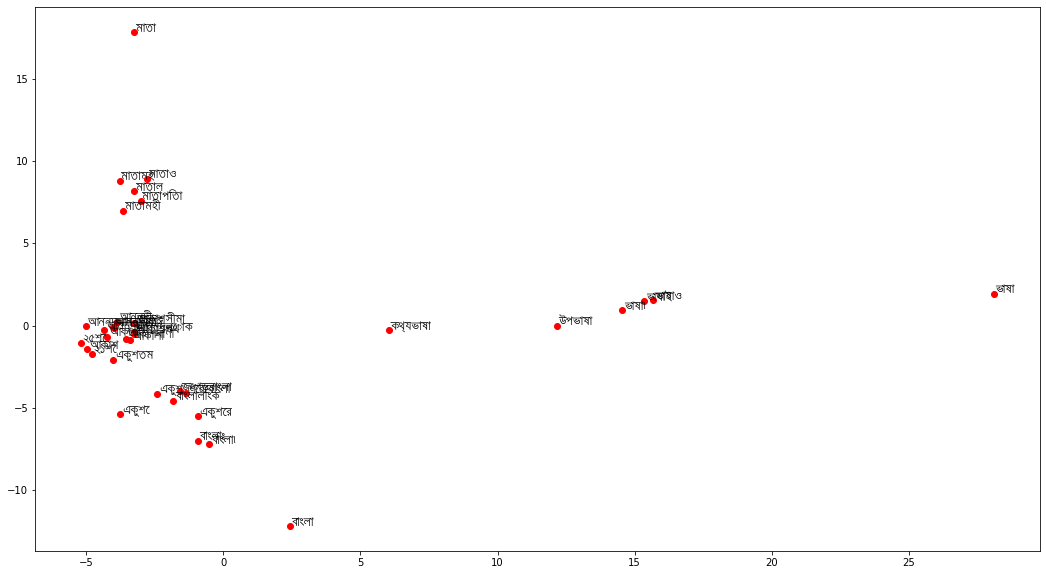

In [25]:


# ছবিটা কিছুটা টেন্সর-ফ্লো এর এমবেডিং প্রজেক্টরের মতো

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# সিয়াম রুপালি ফন্ট ব্যবহার করছি 
!wget https://www.omicronlab.com/download/fonts/Siyamrupali.ttf
prop = fm.FontProperties(fname='Siyamrupali.ttf')

plt.figure(figsize=(18, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_name, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_name, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points', fontproperties=prop)
